# 1 Predict Customer Churn

## 1.1 Step 1: Problem Statement

In this project we will analyze a credit card dataset provided by <a href="https://leapsapp.analyttica.com/cases/11" target="_blank">Analyticca TreasureHunt Leaps</a> using Python. The dataset contains more than 10k credit card accounts, 20 features and an attrition flag collected over a 6 month period. 

Customer churn is the percentage of customers that stop using a company service or product during a time period. To calculate the churn rate, divide the number of customers the business lost during a time period by the number of customers the business had at the beginning of that time period. Customer churn rate is an important metric for any business to evaluate because it costs more to acquire new customers than it does to retain existing ones. By understanding what factors increase churn rate a business can identify and improve their customer retention strategies.

Our goal is to identify the biggest factors that lead to customer churn. We will do this by analyzing each feature against the attrition flag to determine what features have the strongest impact on the target.<br>


## 1.2 Step 2: Data Acquisition

We obtained this dataset from <a href="https://leapsapp.analyttica.com/cases/11" target="_blank">Analyticca TreasureHunt Leaps</a>.

The dataset contains 10,127 records. There are 20 features and 1 target (Attrition Flag).

The data is structured and we will use supervised learning models to make the predictions.

## 1.3 Step 3: Data Dictionary
The dataset contains the following columns of data.

| Column Name              | Data Type   | Description                                                                                                                         |
|--------------------------|-------------|-------------------------------------------------------------------------------------------------------------------------------------|
| Clientnum                | Int         | Client number. Unique identifier for the customer holding the account                                                               |
| Attrition_Flag           | Categorical | Customer status variable - Existing Customer, Attrited Customer                                                                     |
| Customer_Age             | Int         | Demographic variable - Customer's Age in Years                                                                                      |
| Gender                   | Categorical | Demographic variable - M=Male, F=Female                                                                                             |
| Dependent_count          | Int         | Demographic variable - Number of dependents                                                                                         |
| Education_Level          | Categorical | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)               |
| Marital_Status           | Categorical | Demographic variable - Married, Single, Unknown                                                                                     |
| Income_Category          | Categorical | Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) |
| Card_Category            | Categorical | Product Variable - Type of Card (Blue, Silver, Gold, Platinum)                                                                      |
| Months_on_book           | Int         | Months on book (Time of Relationship)                                                                                               |
| Total_Relationship_Count | Int         | Total no. of products held by the customer                                                                                          |
| Months_Inactive_12_mon   | Int         | No. of months inactive in the last 12 months                                                                                        |
| Contacts_Count_12_mon    | Int         | No. of Contacts in the last 12 months                                                                                               |
| Credit_Limit             | Float       | Credit Limit on the Credit Card                                                                                                     |
| Total_Revolving_Bal      | Int         | Total Revolving Balance on the Credit Card                                                                                          |
| Avg_Open_To_Buy          | Float       | Open to Buy Credit Line (Average of last 12 months)                                                                                 |
| Total_Amt_Chng_Q4_Q1     | Float       | Change in Transaction Amount (Q4 over Q1)                                                                                           |
| Total_Trans_Amt          | Int         | Total Transaction Amount (Last 12 months)                                                                                           |
| Total_Trans_Ct           | Int         | Total Transaction Count (Last 12 months)                                                                                            |
| Total_Ct_Chng_Q4_Q1      | Float       | Change in Transaction Count (Q4 over Q1)                                                                                            |
| Avg_Utilization_Ratio    | Float       | Average Card Utilization Ratio                                                                                                      |

Each row contains column information for a customer. Customers are identified using the Clientnum column.
The Attrition_Flag column classifies each customer as either existing or attrited at the end of the 6 month period.

Here is a snapshot of the dataset.

-- <b><i>Convert df.head() output to markdown table here</i></b>

## 1.4  Step 4: Feature Extraction
There are no specific features we need to extract for this project.

## 1.5  Step 5: Data Cleaning

- Dropped unused columns
    - Clientnum is a unique identifier for each row and will not be used
    - The classifier columns below were included in the dataset but cannot be used in analysis
        - Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
        - Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2

- Standardized strings
    - Convert to lower case
    - Replace spaces with underscores
    - Remove white spaces around the string
    - Check for inconsistent spellings
    - Check for null Values

Here is a snapshot of the dataset after data cleaning

-- <b><i>Convert df.head() output to markdown table here</i></b>


'|    |   CLIENTNUM | Attrition_Flag    |   Customer_Age | Gender   |   Dependent_count | Education_Level   | Marital_Status   | Income_Category   | Card_Category   |   Months_on_book |   Total_Relationship_Count |   Months_Inactive_12_mon |   Contacts_Count_12_mon |   Credit_Limit |   Total_Revolving_Bal |   Avg_Open_To_Buy |   Total_Amt_Chng_Q4_Q1 |   Total_Trans_Amt |   Total_Trans_Ct |   Total_Ct_Chng_Q4_Q1 |   Avg_Utilization_Ratio |   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 |   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 |\n|---:|------------:|:------------------|---------------:|:---------|------------------:|:------------------|:-----------------|:------------------|:----------------|-----------------:|---------------------------:|-------------------------:|------------------------:|---------------:|----------------------:|------------------:|-----------------------:|------------------:|-----------------:|----------------------:|------------------------:|-------------------------------------------------------------------------------------------------------------------------------------:|-------------------------------------------------------------------------------------------------------------------------------------:|\n|  0 |   768805383 | Existing Customer |             45 | M        |                 3 | High School       | Married          | $60K - $80K       | Blue            |               39 |                          5 |                        1 |                       3 |          12691 |                   777 |             11914 |                  1.335 |              1144 |               42 |                 1.625 |                   0.061 |                                                                                                                           9.3448e-05 |                                                                                                                              0.99991 |\n|  1 |   818770008 | Existing Customer |             49 | F        |                 5 | Graduate          | Single           | Less than $40K    | Blue            |               44 |                          6 |                        1 |                       2 |           8256 |                   864 |              7392 |                  1.541 |              1291 |               33 |                 3.714 |                   0.105 |                                                                                                                           5.6861e-05 |                                                                                                                              0.99994 |\n|  2 |   713982108 | Existing Customer |             51 | M        |                 3 | Graduate          | Married          | $80K - $120K      | Blue            |               36 |                          4 |                        1 |                       0 |           3418 |                     0 |              3418 |                  2.594 |              1887 |               20 |                 2.333 |                   0     |                                                                                                                           2.1081e-05 |                                                                                                                              0.99998 |\n|  3 |   769911858 | Existing Customer |             40 | F        |                 4 | High School       | Unknown          | Less than $40K    | Blue            |               34 |                          3 |                        4 |                       1 |           3313 |                  2517 |               796 |                  1.405 |              1171 |               20 |                 2.333 |                   0.76  |                                                                                                                           0.00013366 |                                                                                                                              0.99987 |\n|  4 |   709106358 | Existing Customer |             40 | M        |                 3 | Uneducated        | Married          | $60K - $80K       | Blue            |               21 |                          5 |                        1 |                       0 |           4716 |                     0 |              4716 |                  2.175 |               816 |               28 |                 2.5   |                   0     |                                                                                                                           2.1676e-05 |                                                                                                                              0.99998 |'

1.4  Step 4: Feature Extraction

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_curve, roc_auc_score, precision_score, confusion_matrix
from sklearn.metrics import roc_curve

from tabulate import tabulate

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("../data/external/dataset.csv")
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [10]:
df.head().to_markdown()

'|    |   CLIENTNUM | Attrition_Flag    |   Customer_Age | Gender   |   Dependent_count | Education_Level   | Marital_Status   | Income_Category   | Card_Category   |   Months_on_book |   Total_Relationship_Count |   Months_Inactive_12_mon |   Contacts_Count_12_mon |   Credit_Limit |   Total_Revolving_Bal |   Avg_Open_To_Buy |   Total_Amt_Chng_Q4_Q1 |   Total_Trans_Amt |   Total_Trans_Ct |   Total_Ct_Chng_Q4_Q1 |   Avg_Utilization_Ratio |   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 |   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 |\n|---:|------------:|:------------------|---------------:|:---------|------------------:|:------------------|:-----------------|:------------------|:----------------|-----------------:|---------------------------:|-------------------------:|------------------------:|---------------:|---

## Data Cleaning
### Dropping unused columns
- CLIENTNUM is a unique identifier for each row and will not be used
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 & Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 are classifier columns derived either from the bank's internal team or from the original poster of the dataset

In [11]:
df = df.drop(["CLIENTNUM", 
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", 
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
             ], axis=1)
df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  Existing Customer            45      M                3     High School   
1  Existing Customer            49      F                5        Graduate   
2  Existing Customer            51      M                3        Graduate   
3  Existing Customer            40      F                4     High School   
4  Existing Customer            40      M                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

### Standardize strings
- Convert them to lower case
- Replace spaces with underscores
- Remove white spaces around the string

In [12]:
# Replace spaces with underscores
df.replace('\s+', '_', regex=True, inplace=True)

# Convert them to lower case & trim white spaces around strings
df = df.applymap(lambda x: x.lower().strip() if type(x)==str else x)

df.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
0  existing_customer            45      m                3     high_school   
1  existing_customer            49      f                5        graduate   
2  existing_customer            51      m                3        graduate   
3  existing_customer            40      f                4     high_school   
4  existing_customer            40      m                3      uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        married     $60k_-_$80k          blue              39   
1         single  less_than_$40k          blue              44   
2        married    $80k_-_$120k          blue              36   
3        unknown  less_than_$40k          blue              34   
4        married     $60k_-_$80k          blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

In [13]:
df.head().to_markdown()

'|    | Attrition_Flag    |   Customer_Age | Gender   |   Dependent_count | Education_Level   | Marital_Status   | Income_Category   | Card_Category   |   Months_on_book |   Total_Relationship_Count |   Months_Inactive_12_mon |   Contacts_Count_12_mon |   Credit_Limit |   Total_Revolving_Bal |   Avg_Open_To_Buy |   Total_Amt_Chng_Q4_Q1 |   Total_Trans_Amt |   Total_Trans_Ct |   Total_Ct_Chng_Q4_Q1 |   Avg_Utilization_Ratio |\n|---:|:------------------|---------------:|:---------|------------------:|:------------------|:-----------------|:------------------|:----------------|-----------------:|---------------------------:|-------------------------:|------------------------:|---------------:|----------------------:|------------------:|-----------------------:|------------------:|-----------------:|----------------------:|------------------------:|\n|  0 | existing_customer |             45 | m        |                 3 | high_school       | married          | $60k_-_$80k       | blue   

- Check for inconsistent spellings

In [ ]:
# df['Education_Level'].value_counts() # Shows the unique values and counts
# df['Education_Level'].value_counts().values # Shows the unique value counts only
# df['Education_Level'].value_counts().index # Shows the unique values only

In [161]:
df['Attrition_Flag'].value_counts()

existing_customer    8500
attrited_customer    1627
Name: Attrition_Flag, dtype: int64

In [162]:
df['Gender'].value_counts()

f    5358
m    4769
Name: Gender, dtype: int64

In [163]:
df['Education_Level'].value_counts()

graduate         3128
high_school      2013
unknown          1519
uneducated       1487
college          1013
post-graduate     516
doctorate         451
Name: Education_Level, dtype: int64

In [164]:
df['Marital_Status'].value_counts()

married     4687
single      3943
unknown      749
divorced     748
Name: Marital_Status, dtype: int64

In [165]:
df['Income_Category'].value_counts()

less_than_$40k    3561
$40k_-_$60k       1790
$80k_-_$120k      1535
$60k_-_$80k       1402
unknown           1112
$120k_+            727
Name: Income_Category, dtype: int64

In [166]:
df['Card_Category'].value_counts()

blue        9436
silver       555
gold         116
platinum      20
Name: Card_Category, dtype: int64

- Check for null Values

In [5]:
df.isnull().sum(axis=0)

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There are no null values in this dataset

## Pairs Plot

Text(0.5, 0.98, 'Features Pair Plot')

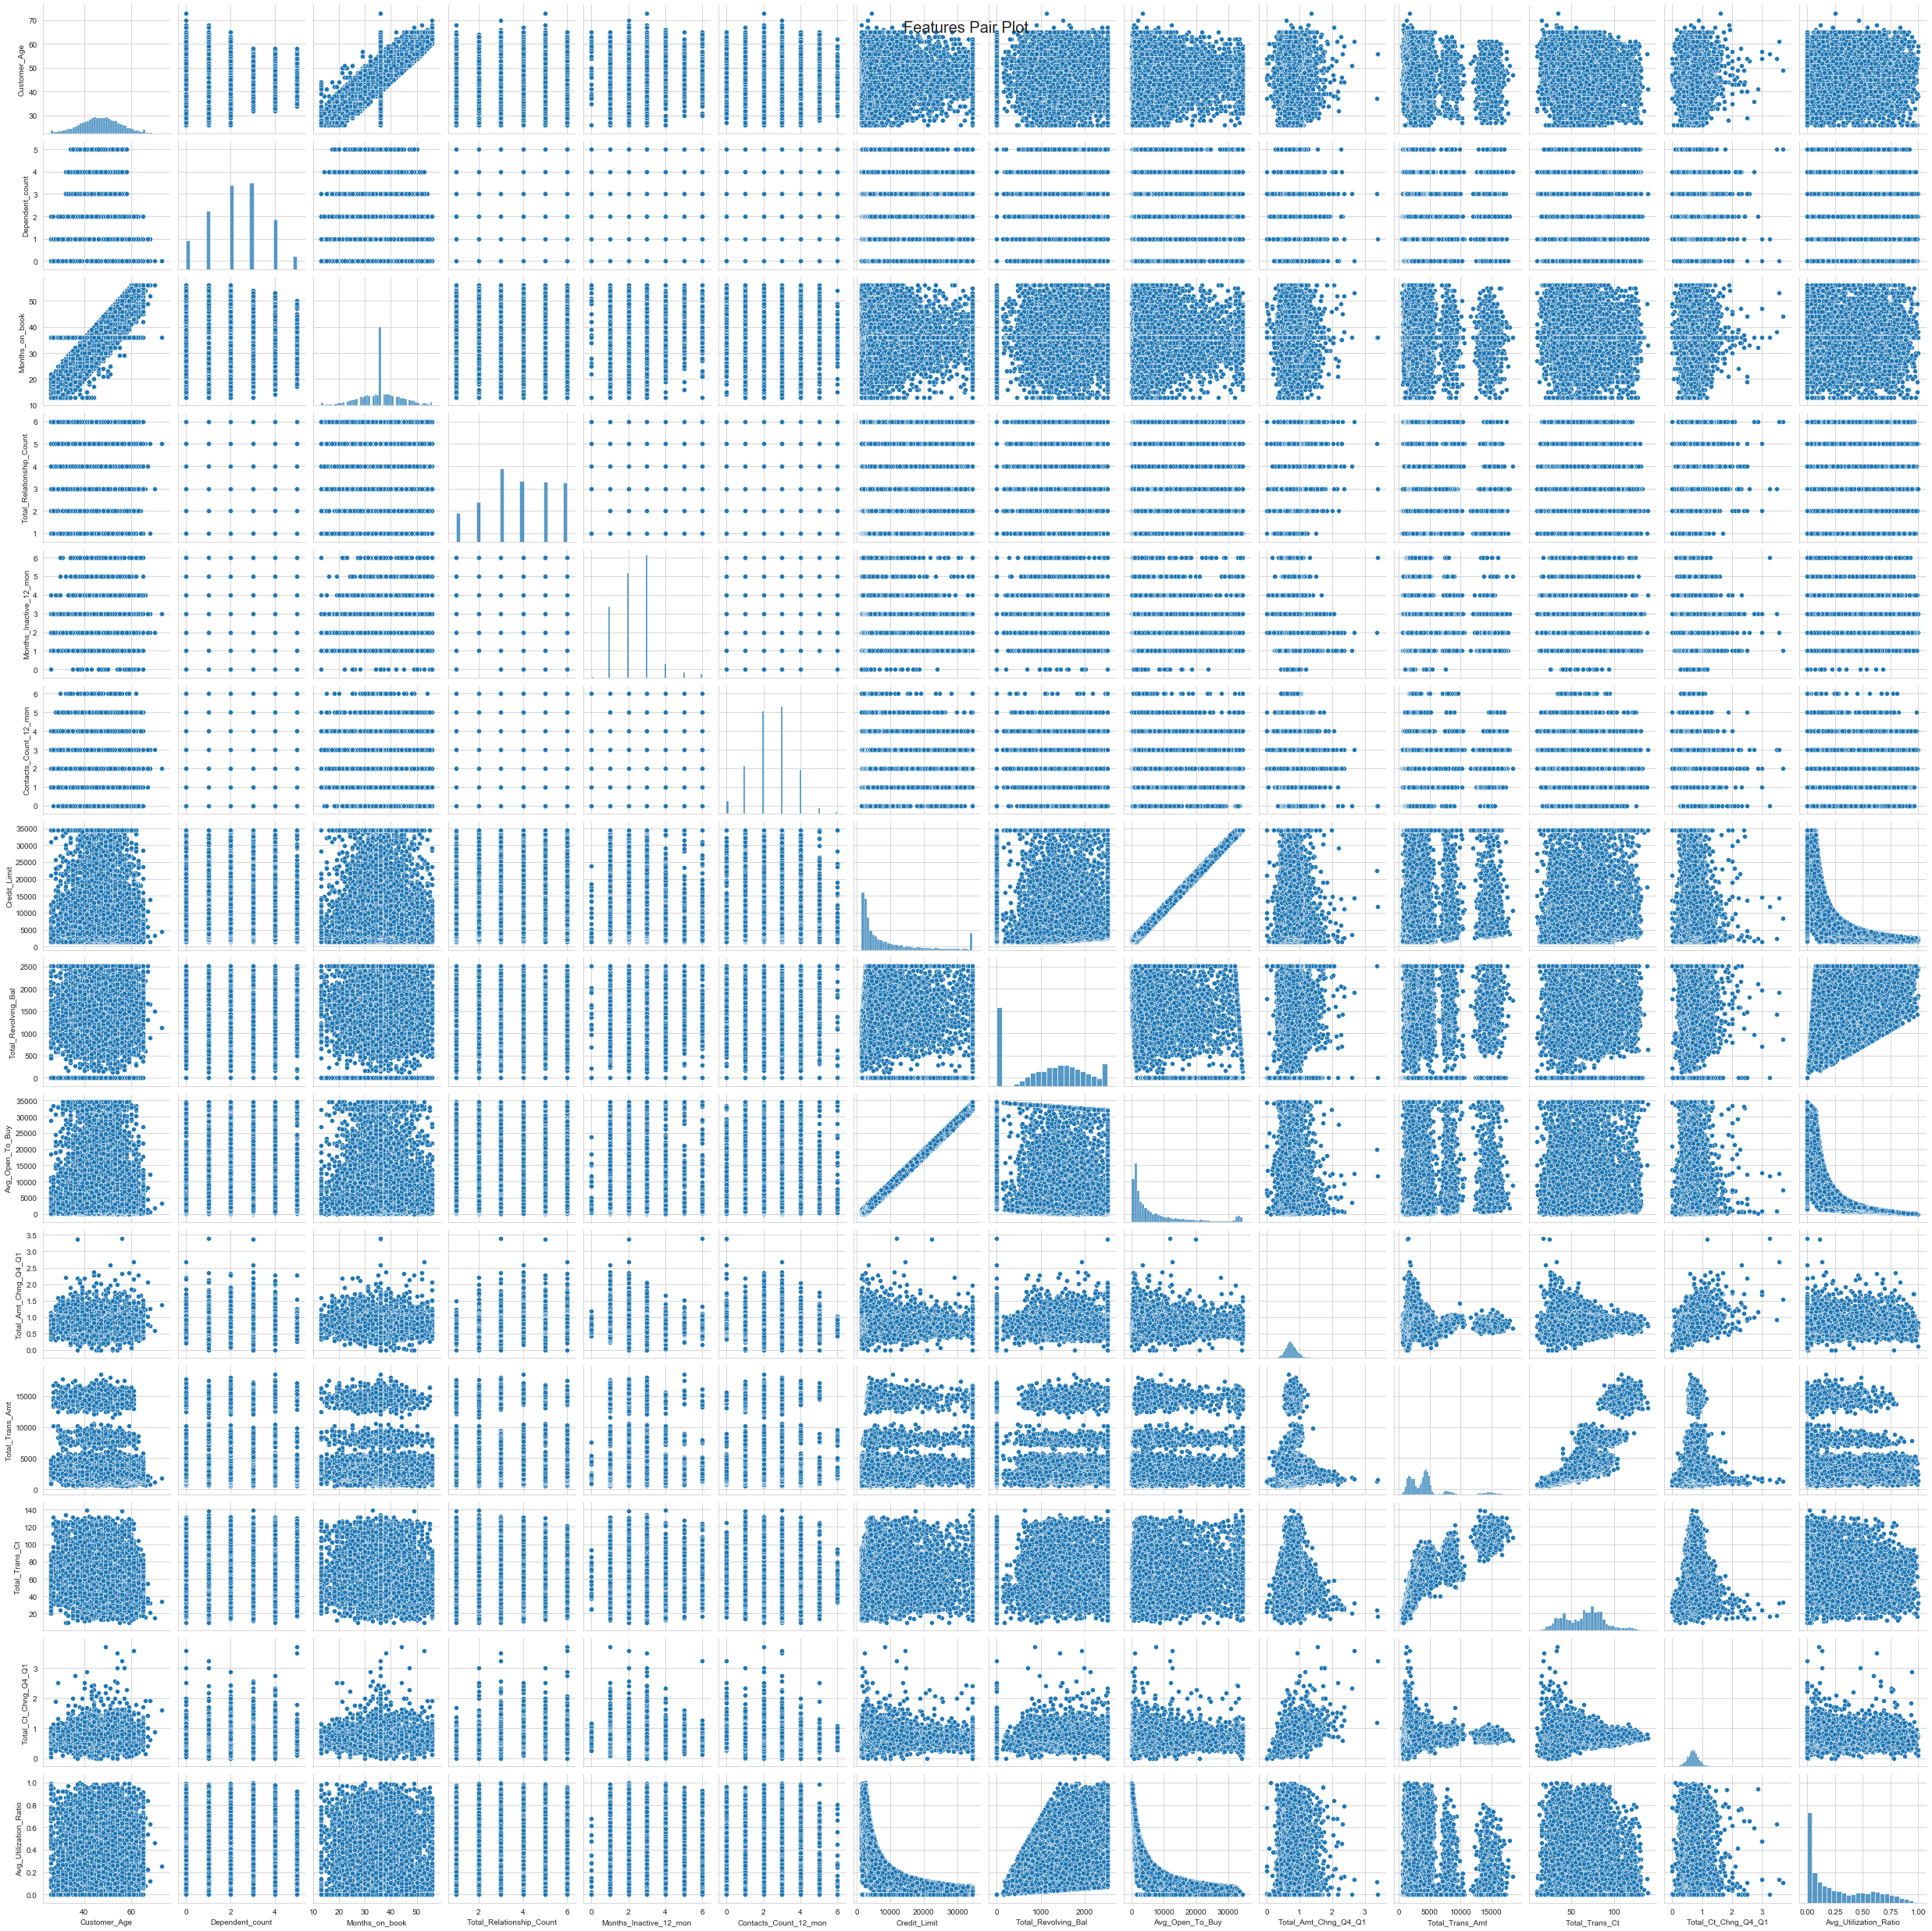

In [6]:
plot = sns.pairplot(df)
plot.fig.suptitle('Features Pair Plot', fontsize=20)

The pairs plot allows us to rapidly examine the distribution of single features as well as relationships between the features in the dataset.<br>
Default pairs plot only plots numerical features although we can use categorical features for coloring. We will not be exploring this feature at this time because we have not covered this yet in DS2.<br><br>
Some quick observations made here:
<ol>
    <li>Months_on_book and Customer_Age are positively correlated. The older the customer the more months on book</li>
    <li>Avg_Open_To_Buy & Credit_Limit are positively correlated. The higher the credit limit the higher the credit line.</li>
    <li>Avg_Utilization_Ratio & Credit_Limit are negatively correlated. The higher the credit limit the lower the utilization ratio. This is also evident in the previous observation.</li>
    <li>Total_Trans_Ct & Total_Trans_Amt are positively correlated. The higher the transaction amount the higher the customer transaction count. This is also seen when looking at the relationship between Total_Amt_Chng_Q4_Q1 & Total_Ct_Chng_Q4_Q1 which are positively correlated.</li>
    <li>Customer median age is between 40 & 60</li>
    <li>Avg Dependent count is 2 or 3</li>
    <li>Avg Months_on_book is around 35 months</li>
    <li>Avg Total_Relationship_Count is between 4 & 5</li>
    <li>In the last 12 months, most customers have been inactive between 1 & 3 months</li>
    <li>In the last 12 months, avg customer contact is between 2 - 3 times</li>
    <li>Large number of customers with upto 5k credit limit, then progressive decline in credit limits upto 35k. There is also a large group of customers with high ~35k credit limit.</li>
    <li>Large # of customers with 0 Total_Revolving_Bal, then another group that average 1500, then 3rd group at ~2.5k</li>
    <li>Large # of customers with low credit line (Avg_Open_To_Buy)</li>
    <li>Credit limit is heavily left skewed</li>
    <li>Revolving balance is heavily right skewed</li>
</ol>

## Correlation Matrix

In [171]:
corrMatrix = df.corr()
# print(corrMatrix)

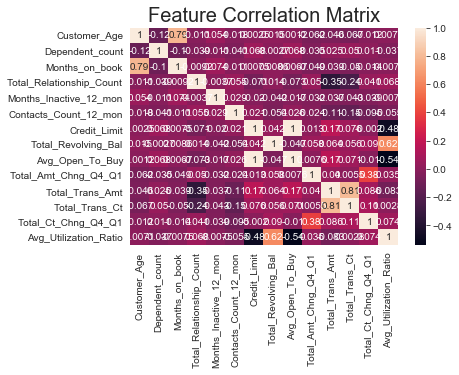

In [8]:
sns.heatmap(corrMatrix, annot=True)
plt.title('Feature Correlation Matrix',fontsize=20)
plt.show()

A correlation matrix table shows the correlation coefficients between features. The diagonal line of 1's shows that the features perfectly correlate with themselves. So cells that are close to 1 show higher correlation between features.<br>
From the correlation matrix above we are going to further analyze the following features:
- Avg_Open_To_Buy vs Credit_Limit
- Total_Trans_Ct vs Total_Trans_Amt
- Customer_Age vs Months_on_book
- Total_Revolving_Bal vs Avg_Utilization_Ratio

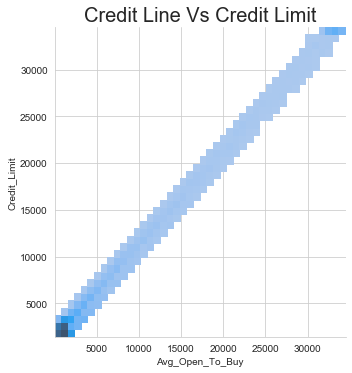

In [9]:
sns.displot(data=df, x='Avg_Open_To_Buy', y='Credit_Limit')
plt.title('Credit Line Vs Credit Limit',fontsize=20);

Credit line is positively correlated to credit limit. The higher the credit limit, the higher the credit line.

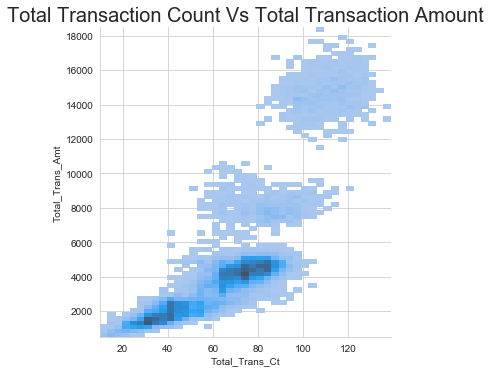

In [10]:
sns.displot(data=df, x='Total_Trans_Ct', y='Total_Trans_Amt')
plt.title('Total Transaction Count Vs Total Transaction Amount',fontsize=20);

As the total transaction count increases so does the total transaction amount. There is a dense population of transactions around ~2k amount/40 ct and ~5k/80 ct.

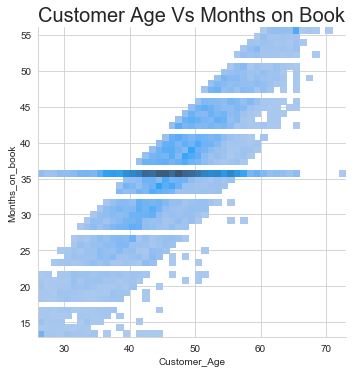

In [11]:
sns.displot(data=df, x='Customer_Age', y='Months_on_book')
plt.title('Customer Age Vs Months on Book',fontsize=20);

Age and months on book are positively correlated. As customer age goes up they months on book continues to rise, so customers are sticking with the bank over long periods of time. Looks like we have a dense population around 35 months.

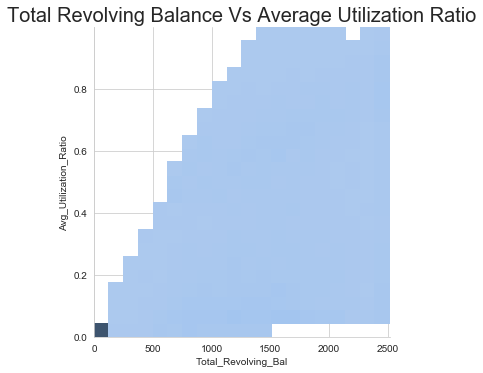

In [12]:
sns.displot(data=df, x='Total_Revolving_Bal', y='Avg_Utilization_Ratio')
plt.title('Total Revolving Balance Vs Average Utilization Ratio',fontsize=20);

Average utilization and total revolving balance are positively correlated. As the balance goes up so does the utilization. 

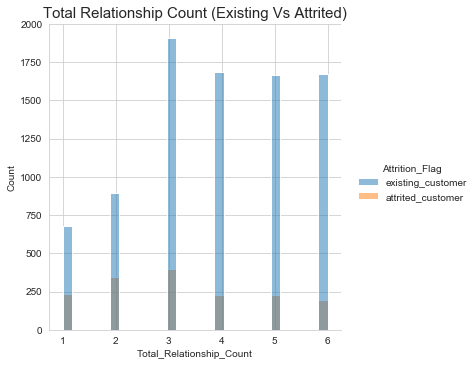

In [13]:
sns.displot(data=df, x='Total_Relationship_Count', hue='Attrition_Flag')
plt.title('Total Relationship Count (Existing Vs Attrited)',fontsize=15);

Existing customers tend to have more relationships than attrited customers.

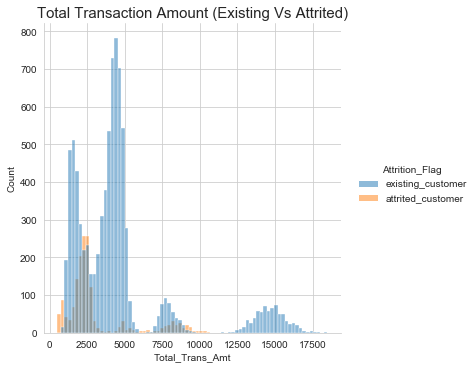

In [14]:
sns.displot(data=df, x='Total_Trans_Amt', hue='Attrition_Flag')
plt.title('Total Transaction Amount (Existing Vs Attrited)',fontsize=15);

Total transaction amount has 4 peaks at ~2.5k, ~5k, ~7.5k & ~15k. ~2.5 and ~5k peaks are the highest which could be as a result of more customers using bank products offered in this range. Attrited customers have two main peaks at ~2.5k and ~7.5k. There is a smaller ~5k peak, but this does not match the existing customer pattern.

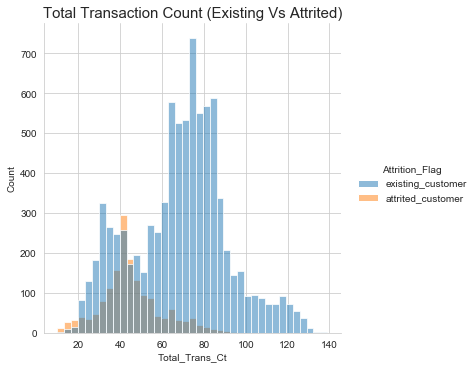

In [15]:
sns.displot(data=df, x='Total_Trans_Ct', hue='Attrition_Flag')
plt.title('Total Transaction Count (Existing Vs Attrited)',fontsize=15);

Total transaction count for attrited customers peaked at around 40 transactions, existing customers transaction count is double that peaking at around 80 transactions.

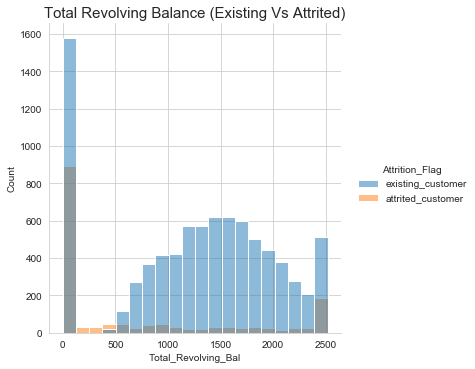

In [16]:
sns.displot(data=df, x='Total_Revolving_Bal', hue='Attrition_Flag')
plt.title('Total Revolving Balance (Existing Vs Attrited)',fontsize=15);

Majority of attrited customers do not utilize their credit cards, as shown above. They keep a total revolving balance near or at 0. Out of those that maintain a revolving balance, the majority have a revolving balance of around 2500.

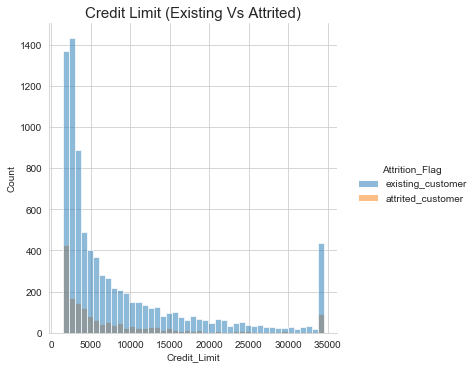

In [17]:
sns.displot(data=df, x='Credit_Limit', hue='Attrition_Flag')
plt.title('Credit Limit (Existing Vs Attrited)',fontsize=15);

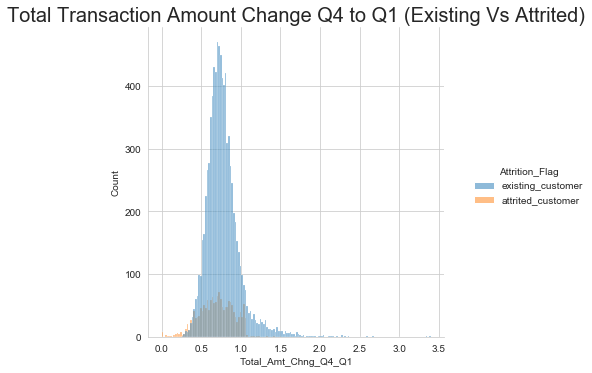

In [18]:
sns.displot(data=df, x='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag')
plt.title('Total Transaction Amount Change Q4 to Q1 (Existing Vs Attrited)',fontsize=20);

Transaction amount was much lower for attrited customers.

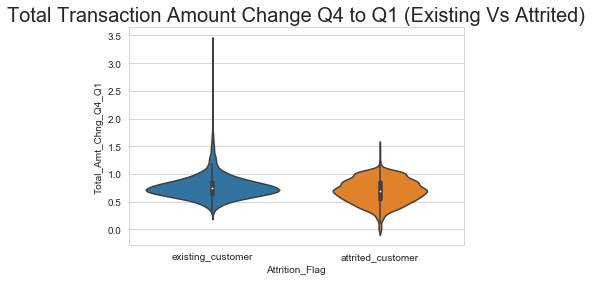

In [19]:
sns.violinplot(x="Attrition_Flag", y="Total_Amt_Chng_Q4_Q1", data=df)
plt.title('Total Transaction Amount Change Q4 to Q1 (Existing Vs Attrited)',fontsize=20);

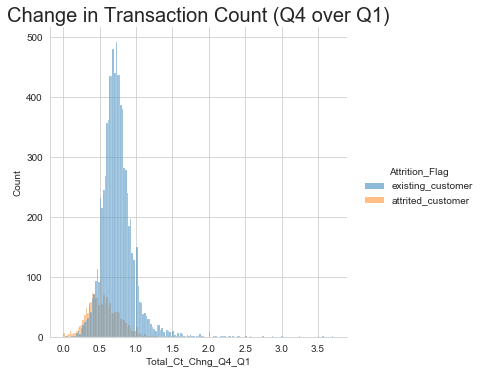

In [20]:
sns.displot(data=df, x='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag')
plt.title('Change in Transaction Count (Q4 over Q1)',fontsize=20);

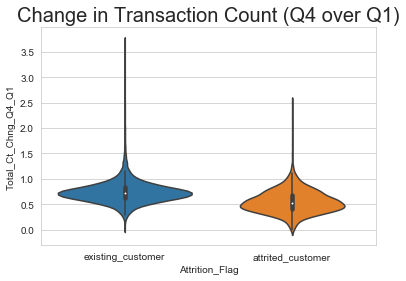

In [21]:
sns.violinplot(x="Attrition_Flag", y="Total_Ct_Chng_Q4_Q1", data=df)
plt.title('Change in Transaction Count (Q4 over Q1)',fontsize=20);

Change in transaction count (Q4 over Q1) is the difference in transactions between Q4 and Q1. Existing customers had ~500 transaction while attrited customers had ~100 transactions.

# Outliers

In [22]:
df.describe()

Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

Most columns have acceptable anomaly range, and there is no erroneous data captured such unnaturally high customer age. If you compare mean and median (50%) values, the larger the values the more likelihood of outliers in those features. For example, credit limit mean is \\$8631.95 while the median is $4549. This could indicate there are outliers due to wide discrepancy.
Avg_Open_To_Buy - could be the amount of credit available to use at a given time & Avg_Utilization_Ratio. This also has a wide discrepancy but that may be normal. We will plot to confirm.

### Interquartile Range (IQR) is a measure of statistical dispersion

IQR is the 1st quartile subtracted from the 3rd quartile.

In [172]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Customer_Age                  11.000
Dependent_count                2.000
Months_on_book                 9.000
Total_Relationship_Count       2.000
Months_Inactive_12_mon         1.000
Contacts_Count_12_mon          1.000
Credit_Limit                8512.500
Total_Revolving_Bal         1425.000
Avg_Open_To_Buy             8534.500
Total_Amt_Chng_Q4_Q1           0.228
Total_Trans_Amt             2585.500
Total_Trans_Ct                36.000
Total_Ct_Chng_Q4_Q1            0.236
Avg_Utilization_Ratio          0.480
dtype: float64


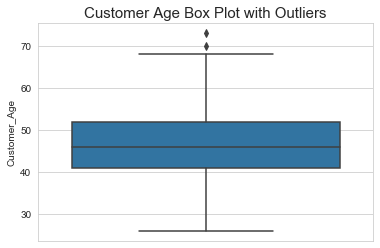

In [24]:
sns.boxplot(y='Customer_Age', hue='Attrition_Flag', data=df)
plt.title('Customer Age Box Plot with Outliers',fontsize=15);

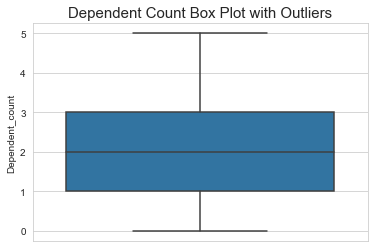

In [25]:
sns.boxplot(y='Dependent_count', hue='Attrition_Flag', data=df)
plt.title('Dependent Count Box Plot with Outliers',fontsize=15);

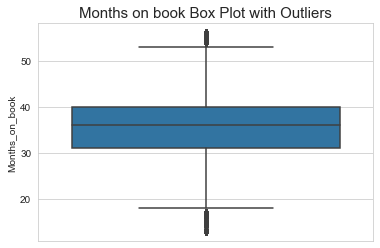

In [26]:
sns.boxplot(y='Months_on_book', hue='Attrition_Flag', data=df)
plt.title('Months on book Box Plot with Outliers',fontsize=15);

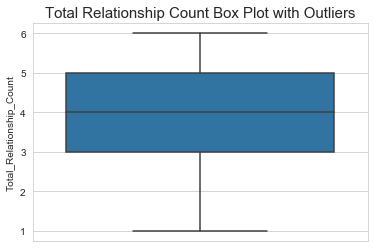

In [27]:
sns.boxplot(y='Total_Relationship_Count', hue='Attrition_Flag', data=df)
plt.title('Total Relationship Count Box Plot with Outliers',fontsize=15);

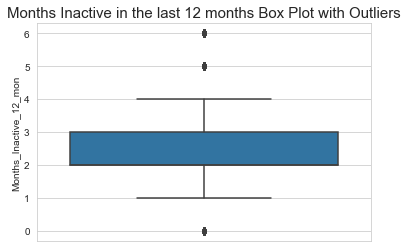

In [28]:
sns.boxplot(y='Months_Inactive_12_mon', hue='Attrition_Flag', data=df)
plt.title('Months Inactive in the last 12 months Box Plot with Outliers',fontsize=15);

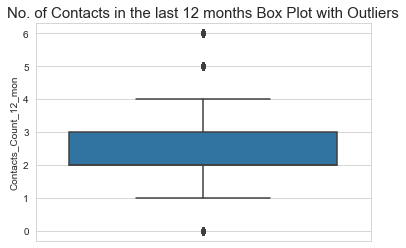

In [29]:
sns.boxplot(y='Contacts_Count_12_mon', hue='Attrition_Flag', data=df)
plt.title('No. of Contacts in the last 12 months Box Plot with Outliers',fontsize=15);

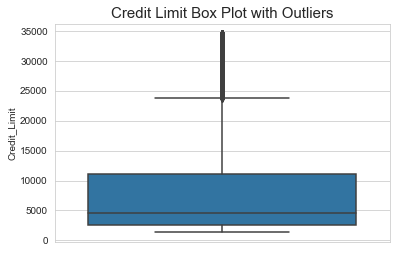

In [30]:
sns.boxplot(y='Credit_Limit', hue='Attrition_Flag', data=df)
plt.title('Credit Limit Box Plot with Outliers',fontsize=15);

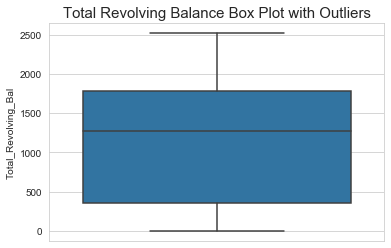

In [31]:
sns.boxplot(y='Total_Revolving_Bal', hue='Attrition_Flag', data=df)
plt.title('Total Revolving Balance Box Plot with Outliers',fontsize=15);

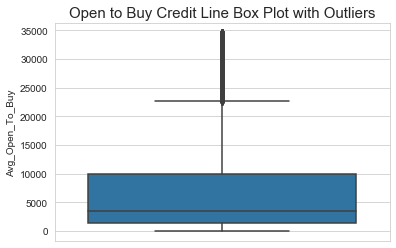

In [32]:
sns.boxplot(y='Avg_Open_To_Buy', hue='Attrition_Flag', data=df)
plt.title('Open to Buy Credit Line Box Plot with Outliers',fontsize=15);

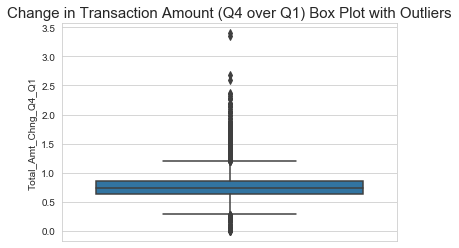

In [33]:
sns.boxplot(y='Total_Amt_Chng_Q4_Q1', hue='Attrition_Flag', data=df)
plt.title('Change in Transaction Amount (Q4 over Q1) Box Plot with Outliers',fontsize=15);

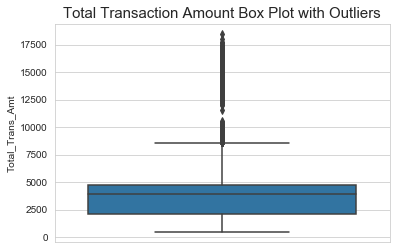

In [34]:
sns.boxplot(y='Total_Trans_Amt', hue='Attrition_Flag', data=df)
plt.title('Total Transaction Amount Box Plot with Outliers',fontsize=15);

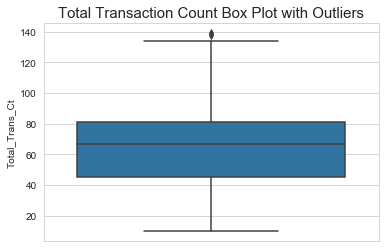

In [35]:
sns.boxplot(y='Total_Trans_Ct', hue='Attrition_Flag', data=df)
plt.title('Total Transaction Count Box Plot with Outliers',fontsize=15);

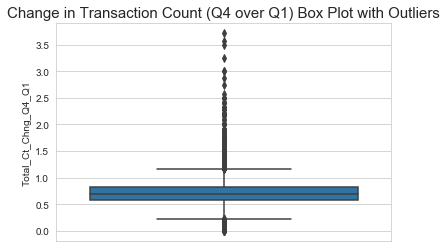

In [36]:
sns.boxplot(y='Total_Ct_Chng_Q4_Q1', hue='Attrition_Flag', data=df)
plt.title('Change in Transaction Count (Q4 over Q1) Box Plot with Outliers',fontsize=15);

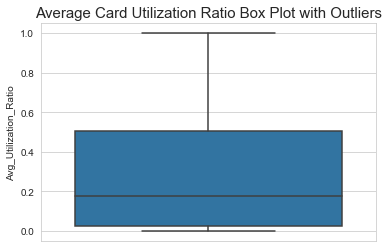

In [37]:
sns.boxplot(y='Avg_Utilization_Ratio', hue='Attrition_Flag', data=df)
plt.title('Average Card Utilization Ratio Box Plot with Outliers',fontsize=15);

### Correcting and Removing Outliers

In [173]:
df_without_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_outliers.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
10  existing_customer            42      m                5      uneducated   
14  existing_customer            57      f                2        graduate   
19  existing_customer            45      f                2        graduate   
21  attrited_customer            62      f                0        graduate   
23  existing_customer            47      f                4         unknown   

   Marital_Status Income_Category Card_Category  Months_on_book  \
10        unknown         $120k_+          blue              31   
14        married  less_than_$40k          blue              48   
19        married         unknown          blue              37   
21        married  less_than_$40k          blue              49   
23         single  less_than_$40k          blue              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10                         5                       3                      2   
14                         5                       2                      2   
19                         6                       1                      2   
21                         2                       3                      3   
23                         3                       3                      2   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
10        6748.0                 1467           5281.0                 0.831   
14        2436.0                  680           1756.0                 1.190   
19       14470.0                 1157          13313.0                 0.966   
21        1438.3                    0           1438.3                 1.047   
23        2492.0                 1560            932.0                 0.573   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
10             1201              42                0.680   
14             1570              29                0.611   
19             1207              21                0.909   
21              692              16                0.600   
23             1126              23                0.353   

    Avg_Utilization_Ratio  
10                  0.217  
14                  0.279  
19                  0.080  
21                  0.000  
23                  0.626

In [174]:
df_without_outliers.shape

(6802, 20)

## Imbalance in the Target Variable
Existing customers account for 83% (8500 records) of the data, while 17% (1627 records) is attrited customers. If we use this data ratio to train our model then the model will be biased towards existing customers.<br>
To deal with this we will use an over sampling technique called SMOTE. Synthetic Minority Oversampling Technique (SMOTE) is a statistical technique for increasing the number of cases in your dataset in a balanced way. The new instances are not just copies of existing rows, the algorithm takes samples of the feature space for each target class and its nearest neighbors. The algorithm then generates new examples that combine features of the target case with features of its neighbors. This approach increases the features available to each class and makes the samples more general.<br>
SMOTE is not guaranteed to produce more accurate models. We will try pipelining with different percentages, different feature sets, and different numbers of nearest neighbors to see how adding cases influences our model.

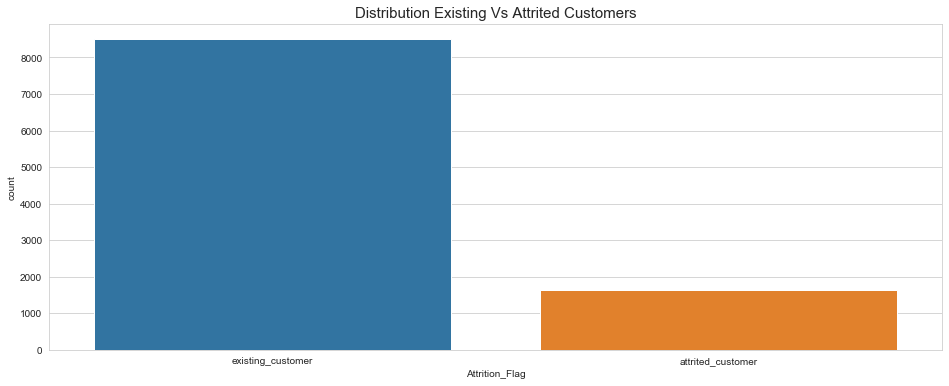

In [189]:
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers", fontsize=15)
sns.countplot(x=df['Attrition_Flag'])

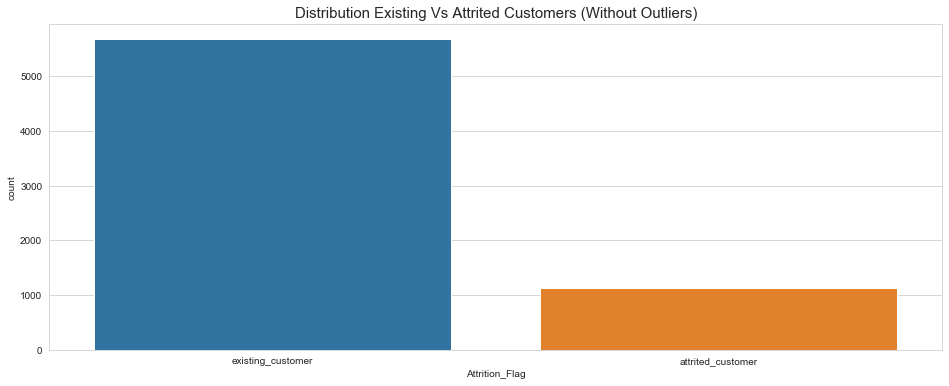

In [198]:
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers (Without Outliers)", fontsize=15)
sns.countplot(x=df_without_outliers['Attrition_Flag'])

In [ ]:
sns.catplot(data=df_without_outliers['Attrition_Flag'], x='xvar', y='yvar', 
    hue='hue_bar', height=8.27, aspect=11.7/8.27)

In [193]:
df['Attrition_Flag'].shape

(10127,)

In [194]:
df_without_outliers['Attrition_Flag'].shape

(6802,)

In [ ]:
merge(data.frame(A, row.names=NULL), data.frame(B, row.names=NULL), 
  by = 0, all = TRUE)[-1]

In [183]:
attrition_flag_outlier_df = pd.DataFrame(df_without_outliers, columns = ['Attrition_Flag'])
attrition_flag_outlier_df.rename(columns = {'Attrition_Flag':'Attrition_Flag_Without_Outliers'}, inplace = True)
attrition_flag_outlier_df['Attrition_Flag'] = df['Attrition_Flag']
attrition_flag_outlier_df.head()

Attrition_Flag_Without_Outliers     Attrition_Flag
10               existing_customer  existing_customer
14               existing_customer  existing_customer
19               existing_customer  existing_customer
21               attrited_customer  attrited_customer
23               existing_customer  existing_customer

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\david\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  after removing the cwd from sys.path.


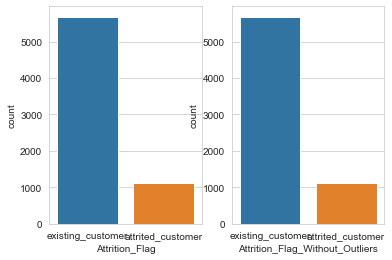

In [192]:
fig, ax =plt.subplots(1,2)
sns.countplot(attrition_flag_outlier_df['Attrition_Flag'], ax=ax[0])
sns.countplot(attrition_flag_outlier_df['Attrition_Flag_Without_Outliers'], ax=ax[1])
fig.show()

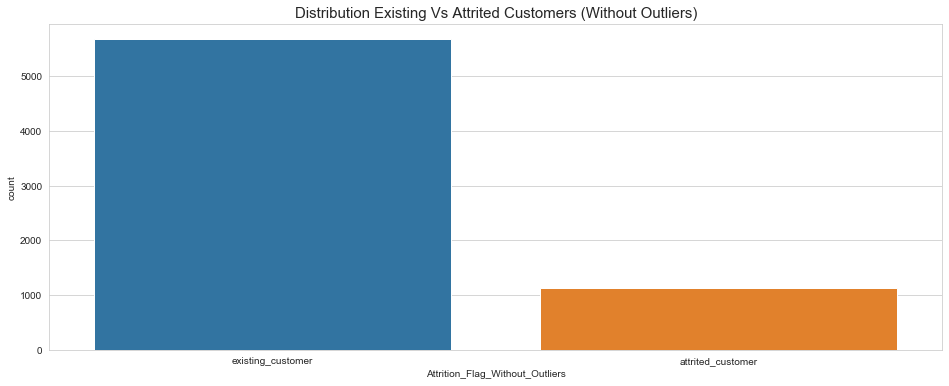

In [186]:
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers (Without Outliers)", fontsize=15)
sns.countplot(x=attrition_flag_outlier_df['Attrition_Flag'])

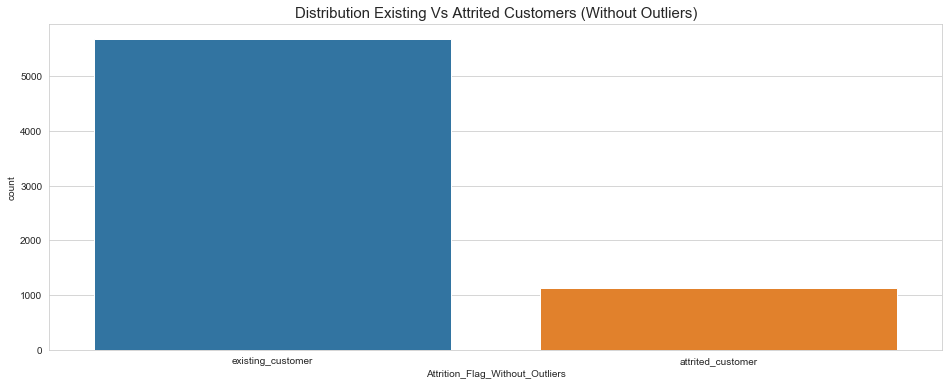

In [188]:
plt.figure(figsize=(16, 6))
plt.title("Distribution Existing Vs Attrited Customers (Without Outliers)", fontsize=15)
sns.countplot(x=attrition_flag_outlier_df['Attrition_Flag_Without_Outliers'])

### Replace Existing/Attrited Customer values with 1 / 0

In [112]:
df_without_outliers.replace(['existing_customer','attrited_customer'],[1,0],inplace=True)
df.replace(['existing_customer','attrited_customer'],[1,0],inplace=True)
df_without_outliers.head()

Attrition_Flag  Customer_Age Gender  Dependent_count Education_Level  \
10               1            42      m                5      uneducated   
14               1            57      f                2        graduate   
19               1            45      f                2        graduate   
21               0            62      f                0        graduate   
23               1            47      f                4         unknown   

   Marital_Status Income_Category Card_Category  Months_on_book  \
10        unknown         $120k_+          blue              31   
14        married  less_than_$40k          blue              48   
19        married         unknown          blue              37   
21        married  less_than_$40k          blue              49   
23         single  less_than_$40k          blue              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10                         5                       3                      2   
14                         5                       2                      2   
19                         6                       1                      2   
21                         2                       3                      3   
23                         3                       3                      2   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
10        6748.0                 1467           5281.0                 0.831   
14        2436.0                  680           1756.0                 1.190   
19       14470.0                 1157          13313.0                 0.966   
21        1438.3                    0           1438.3                 1.047   
23        2492.0                 1560            932.0                 0.573   

    Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
10             1201              42                0.680   
14             1570              29                0.611   
19             1207              21                0.909   
21              692              16                0.600   
23             1126              23                0.353   

    Avg_Utilization_Ratio  
10                  0.217  
14                  0.279  
19                  0.080  
21                  0.000  
23                  0.626

## One hot encoding for categorical variables - convert categorical to numeric

In [113]:
df_without_outliers_cc_encoded = pd.get_dummies(df_without_outliers)
df_cc_encoded = pd.get_dummies(df)
df_without_outliers_cc_encoded.head()

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
10               1            42                5              31   
14               1            57                2              48   
19               1            45                2              37   
21               0            62                0              49   
23               1            47                4              36   

    Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
10                         5                       3                      2   
14                         5                       2                      2   
19                         6                       1                      2   
21                         2                       3                      3   
23                         3                       3                      2   

    Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
10        6748.0                 1467           5281.0  ...   
14        2436.0                  680           1756.0  ...   
19       14470.0                 1157          13313.0  ...   
21        1438.3                    0           1438.3  ...   
23        2492.0                 1560            932.0  ...   

    Income_Category_$120k_+  Income_Category_$40k_-_$60k  \
10                        1                            0   
14                        0                            0   
19                        0                            0   
21                        0                            0   
23                        0                            0   

    Income_Category_$60k_-_$80k  Income_Category_$80k_-_$120k  \
10                            0                             0   
14                            0                             0   
19                            0                             0   
21                            0                             0   
23                            0                             0   

    Income_Category_less_than_$40k  Income_Category_unknown  \
10                               0                        0   
14                               1                        0   
19                               0                        1   
21                               1                        0   
23                               1                        0   

    Card_Category_blue  Card_Category_gold  Card_Category_platinum  \
10                   1                   0                       0   
14                   1                   0                       0   
19                   1                   0                       0   
21                   1                   0                       0   
23                   1                   0                       0   

    Card_Category_silver  
10                     0  
14                     0  
19                     0  
21                     0  
23                     0  

[5 rows x 38 columns]

## Balancing Target using SMOTE
We divide out dataset into a feature (x) and a target set (y), then oversample using SMOTE.

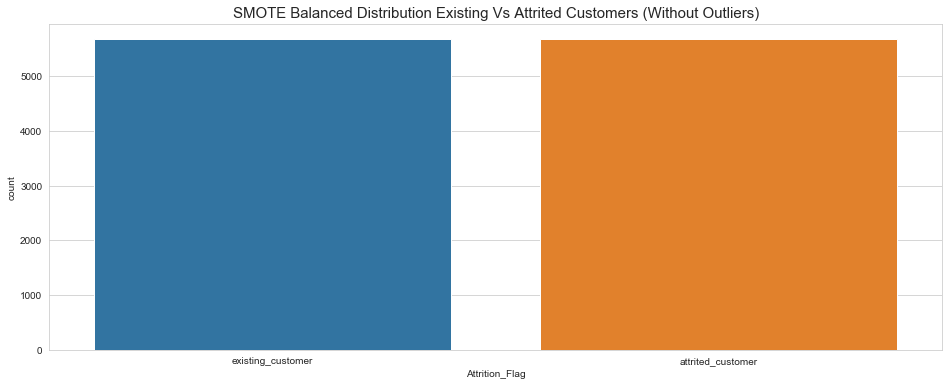

In [10]:
x = df_without_outliers_cc_encoded.drop('Attrition_Flag',axis=1) # Feature set
# x.head()
y = df_without_outliers_cc_encoded['Attrition_Flag'] # Target set
# y = y.sort_values(ascending=False)
# y.head()
smote = SMOTE(random_state=60)
x_smote, y_smote = smote.fit_resample(x,y)
y_smote_df_plot = y_smote.replace([1,0], ['existing_customer','attrited_customer'])
plt.figure(figsize=(16, 6))
plt.title("SMOTE Balanced Distribution Existing Vs Attrited Customers (Without Outliers)", fontsize=15)
sns.countplot(x=y_smote_df_plot)

After oversampling with SMOTE, the data is now balanced and we can proceed to training the model.

## Modeling balanced dataset

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.25, random_state=0)

### Logistic Regression

In [23]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
lr_model_prediction = lr_model.predict(x_test)
print(classification_report(y_test, lr_model_prediction))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1413
           1       0.89      0.90      0.90      1427

    accuracy                           0.90      2840
   macro avg       0.90      0.90      0.90      2840
weighted avg       0.90      0.90      0.90      2840



C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic Regression model has 90% accuracy

### Naive Bayes Classification

In [26]:
nb_model = MultinomialNB().fit(x_train, y_train)
nb_model_prediction = nb_model.predict(x_test)

print(classification_report(y_test, nb_model_prediction))

              precision    recall  f1-score   support

           0       0.59      0.46      0.52      1413
           1       0.56      0.68      0.62      1427

    accuracy                           0.57      2840
   macro avg       0.58      0.57      0.57      2840
weighted avg       0.58      0.57      0.57      2840



Naive Bayes Classification model has 57% accuracy

### Decision Tree Classification

In [31]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model= dt_model.fit(x_train, y_train)

#Predict the response for test dataset
dt_model_prediction = dt_model.predict(x_test)
print(classification_report(y_test, dt_model_prediction))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1413
           1       0.95      0.94      0.94      1427

    accuracy                           0.94      2840
   macro avg       0.94      0.94      0.94      2840
weighted avg       0.94      0.94      0.94      2840



Decision Tree Classification model has 94% accuracy

## Modeling unbalanced dataset

In [114]:
x = df_without_outliers_cc_encoded.drop('Attrition_Flag',axis=1) # Feature set
y = df_without_outliers_cc_encoded['Attrition_Flag'] # Target set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Logistic Regression

In [115]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
lr_model_prediction = lr_model.predict(x_test)
print(classification_report(y_test, lr_model_prediction))

              precision    recall  f1-score   support

           0       0.73      0.59      0.65       284
           1       0.92      0.96      0.94      1417

    accuracy                           0.90      1701
   macro avg       0.83      0.77      0.80      1701
weighted avg       0.89      0.90      0.89      1701



Logistic Regression model has 90% accuracy

### Naive Bayes Classification

In [55]:
nb_model = MultinomialNB().fit(x_train, y_train)
nb_model_prediction = nb_model.predict(x_test)

print(classification_report(y_test, nb_model_prediction))

              precision    recall  f1-score   support

           0       0.24      0.51      0.33       284
           1       0.87      0.68      0.77      1417

    accuracy                           0.65      1701
   macro avg       0.56      0.59      0.55      1701
weighted avg       0.77      0.65      0.69      1701



Naive Bayes Classification model has 65% accuracy

### Decision Tree Classification

In [60]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model.fit(x_train, y_train)

#Predict the response for test dataset
dt_model_prediction = dt_model.predict(x_test)
print(classification_report(y_test, dt_model_prediction))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       284
           1       0.96      0.95      0.96      1417

    accuracy                           0.93      1701
   macro avg       0.87      0.89      0.88      1701
weighted avg       0.93      0.93      0.93      1701



Decision Tree Classification model has 93% accuracy

## Modeling dataset with outliers

In [118]:
df_cc_encoded.head() # this dataset still contains outliers

Attrition_Flag  Customer_Age  Dependent_count  Months_on_book  \
0               1            45                3              39   
1               1            49                5              44   
2               1            51                3              36   
3               1            40                4              34   
4               1            40                3              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  ...  \
0       12691.0                  777          11914.0  ...   
1        8256.0                  864           7392.0  ...   
2        3418.0                    0           3418.0  ...   
3        3313.0                 2517            796.0  ...   
4        4716.0                    0           4716.0  ...   

   Income_Category_$120k_+  Income_Category_$40k_-_$60k  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   Income_Category_$60k_-_$80k  Income_Category_$80k_-_$120k  \
0                            1                             0   
1                            0                             0   
2                            0                             1   
3                            0                             0   
4                            1                             0   

   Income_Category_less_than_$40k  Income_Category_unknown  \
0                               0                        0   
1                               1                        0   
2                               0                        0   
3                               1                        0   
4                               0                        0   

   Card_Category_blue  Card_Category_gold  Card_Category_platinum  \
0                   1                   0                       0   
1                   1                   0                       0   
2                   1                   0                       0   
3                   1                   0                       0   
4                   1                   0                       0   

   Card_Category_silver  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 38 columns]

In [119]:
df_cc_encoded.shape

(10127, 38)

In [120]:
x = df_cc_encoded.drop('Attrition_Flag',axis=1) # Feature set
y = df_cc_encoded['Attrition_Flag'] # Target set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

### Logistic Regression

In [121]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
lr_model_prediction = lr_model.predict(x_test)
print(classification_report(y_test, lr_model_prediction))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58       384
           1       0.91      0.97      0.94      2148

    accuracy                           0.89      2532
   macro avg       0.82      0.73      0.76      2532
weighted avg       0.88      0.89      0.88      2532



Logistic Regression model has 89% accuracy

### Naive Bayes Classification

In [122]:
nb_model = MultinomialNB().fit(x_train, y_train)
nb_model_prediction = nb_model.predict(x_test)

print(classification_report(y_test, nb_model_prediction))

              precision    recall  f1-score   support

           0       0.20      0.41      0.27       384
           1       0.87      0.71      0.78      2148

    accuracy                           0.67      2532
   macro avg       0.54      0.56      0.53      2532
weighted avg       0.77      0.67      0.71      2532



Naive Bayes Classification model has 67% accuracy

### Decision Tree Classification

In [123]:
# Create Decision Tree classifer object
dt_model = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt_model.fit(x_train, y_train)

#Predict the response for test dataset
dt_model_prediction = dt_model.predict(x_test)
print(classification_report(y_test, dt_model_prediction))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       384
           1       0.96      0.97      0.96      2148

    accuracy                           0.94      2532
   macro avg       0.88      0.87      0.87      2532
weighted avg       0.94      0.94      0.94      2532



Decision Tree Classification model has 94% accuracy

## Modeling Summary

We modeling on both balanced and unbalanced datasets (without outliers) as well as on a dataset that included outliers and have the following results:

|                              | Balanced | Unbalanced | With Outliers |
|------------------------------|----------|------------|---------------|
| Logistic Regression          |    90%   |     90%    |      89%      |
| Naive Bayes Classification   |    57%   |     65%    |      67%      |
| Decision Tree Classification |    94%   |     93%    |      94%      |

The balanced and unbalanced dataset did not include outliers.<br>
It does look like SMOTE balancing had much of an impact in modeling this dataset. In both logistic regression and decision tree models there was virtually no difference. There was a sizable 8% difference in the naive bayes classification model.<br>
The dataset that contained outliers yielded similar modeling accuracy results to the unbalanced dataset. The modeling algorithms were not sensitive to outliers in this case.

## Feature Importance

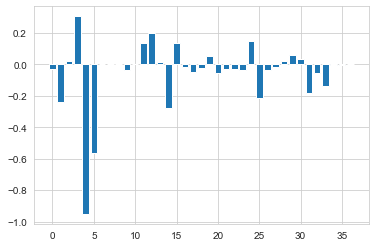

In [86]:
# dt_model = DecisionTreeClassifier()
# dt_model.fit(x_test, y_test)
# pd.Series(dt_model.feature_importances_, index=x.columns[:]).plot.bar(figsize=(19, 6))
importance = lr_model.coef_[0]
# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

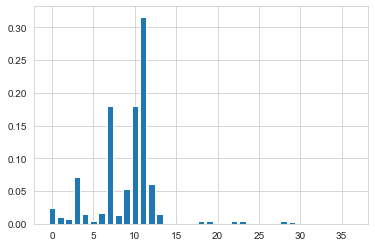

In [87]:
importance = dt_model.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [124]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x, y)

pd.Series(clf.feature_importances_, index=x.columns[:]).plot.bar(figsize=(19, 6))

ValueError: 
40k_-_
      ^
Expected {snowflake | accent | symbol | c_over_c | function | group | frac | dfrac | stackrel | binom | genfrac | sqrt | overline | operatorname}, found end of text  (at char 6), (line:1, col:7)

<Figure size 1368x432 with 1 Axes>

In [133]:
df['Income_Category_codes'] = df['Income_Category'].astype('category').cat.codes
df['Income_Category_codes']
dict(enumerate(df['Income_Category'].astype('category').cat.categories ) )


{0: '$120k_+',
 1: '$40k_-_$60k',
 2: '$60k_-_$80k',
 3: '$80k_-_$120k',
 4: 'less_than_$40k',
 5: 'unknown'}

## Confusion Matrix

In [116]:
confusion_matrix(lr_model_prediction, y_test)

array([[ 167,   61],
       [ 117, 1356]], dtype=int64)

The classifier predicted 1885 existing customers, and 647 attrited customers. In the sample there were 2148 existing customers and 384 attrited customers.

### Accuracy: How often was the classifier correct?
(TP+TN)/total = (1824 + 323)/2532 = 0.84

### Misclassification Rate: How often is the classifier wrong?
(FP+FN)/total = (61 + 324)/2532 = 0.15

### True Positive Rate: When it's actually yes, how often does it predict yes?
TP/actual yes = 1824/2148 = 0.84

## False Positive Rate: When it's actually no, how often does it predict yes?
FP/actual no = 61/384 = 0.15

## True Negative Rate: When it's actually no, how often does it predict no?
TN/actual no = 323/384 = 0.84

## Precision: When it predicts yes, how often is it correct?
TP/predicted yes = 1824/1885 = 0.96

## Prevalence: How often does the yes condition actually occur in our sample?
actual yes/total = 2148/2532 = 0.84